# SarcGraphTools - Visualization

All demos are availble on GitHub at https://github.com/Sarc-Graph/sarcgraph/tree/main/tutorials.

To run demos with `jupyter notebook` check [Installation Guide](https://sarc-graph.readthedocs.io/en/latest/installation.html).

SarcGraph includes the tools for visualization of recovered sarcomere characteristics.

In this notebook we provide a tutorial on how to use the SarcGraph package using demos and examples. The focus is on the ``SarcGraphTools.Visualization`` class in the ``sg_tools`` module.

## Initialization

Run [SarcGraphTools - Analysis Tutorial](https://sarc-graph.readthedocs.io/en/latest/tutorial/analysis.html) or [t3-analysis.ipynb](https://github.com/Sarc-Graph/sarcgraph/blob/main/tutorials/t3-analysis.ipynb) Before running this notebook. This will generate the following files in the directory specified by ``output_dir`` in the tutorial file:

- ``raw-frames.npy``
- ``contours.npy``
- ``sarcomeres_gpr.csv``
- ``recovered_F.npy``
- ``recovered_J.npy``
- ``recovered_OOP.npy``
- ``recovered_OOP_vector.npy``
- ``recovered_metrics.json``
- ``spatial-graph.pkl``
- ``spatial-graph-pos.pkl``
- ``time_series_params.csv``

Create an instance of the ``sg_tools.SarcGraphTools`` class and set ``input_dir`` to the same directory that contains the above files:

In [17]:
from sarcgraph.sg_tools import SarcGraphTools

# Increase the quality to get better looking graphs
sg_tools = SarcGraphTools(input_dir='../tutorial-results', quality=50)

## Visualization of Recovered Information

Here is a list of available functions in the ``SarcGraphTools.Visualization`` class:

- ``zdiscs_and_sarcs()``: Visualizes detected z-discs and sarcomeres in one frame

- ``contraction()``: Visualizes all detected sarcomeres in every frame saved as a gif file

- ``normalized_sarcs_length()``: Plots normalized length of all sarcomeres versus frame number

- ``OOP()``: Plots the recovered Orientational Order Parameter

- ``F()``: Plots the recovered deformation gradient

- ``J()``: Plots the recovered deformation gradient determinant

- ``F_eigenval_animation()``: Visualizes the eigenvalues of U over all frames

- ``timeseries_params()``: Visualizes timeseries parameters

- ``dendrogram()``: Clusters timeseries and plots as a dendrogram of clusters

- ``spatial_graph()``: Visualizes the spatial graph

- ``tracked_vs_untracked()``: Visualizes some metrics to compare sarcomere detection with and without tracking

**Note**

Check the reference api for [SarcGraphTools](https://sarc-graph.readthedocs.io/en/latest/reference/sg_tools.html)

<a id='visualization-functions'></a>

<div class="alert alert-warning">
<strong>Warning:</strong> Some of the functions may take a few minutes to run depending on the number of frames and sarcomeres.
</div>

Now, the functions listed [above](#visualization-functions) can be executed:

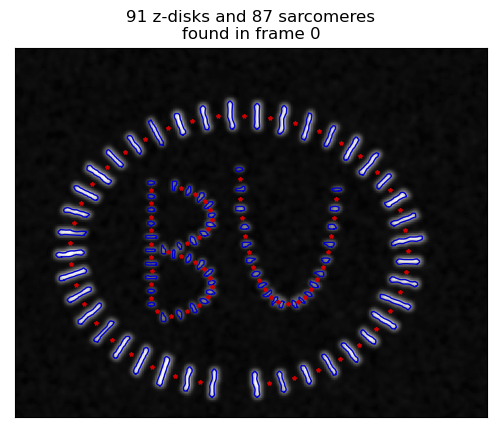

In [18]:
sg_tools.visualization.zdiscs_and_sarcs()

The figure will be saved as ``zdiscs-sarcs-frame-{frame_number}.png``.

**Note**

For any ``png`` image an `.eps` file will also be saved if ``sg_tools.include_eps=True``.

In [19]:
sg_tools.visualization.contraction()

GIF saved as '../tutorial-results/contract_anim.gif'!


To Visualize the GIF saved in the previous step, run the following:

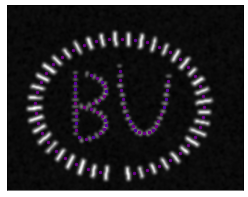

In [20]:
import imageio
from IPython.display import display, Image

def read_gif_frames(file_path):
    with imageio.get_reader(file_path, format='GIF') as reader:
        frames = [frame for frame in reader]
    return frames

def display_gif_frames(frames):
    gif_bytes = imageio.mimwrite(imageio.RETURN_BYTES, frames, format='GIF')
    display(Image(data=gif_bytes))

# Read the frames from the existing GIF file
gif_path = '../tutorial-results/contract_anim.gif'
gif_frames = read_gif_frames(gif_path)

# Display the GIF using IPython.display
display_gif_frames(gif_frames)

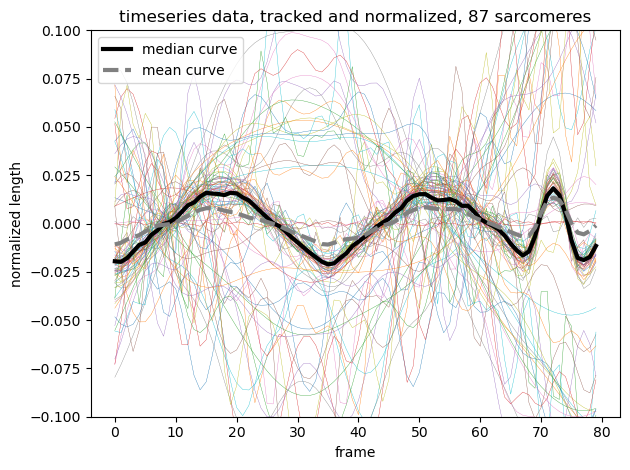

In [21]:
sg_tools.visualization.normalized_sarcs_length()

The figure will be saved as ``normalized_sarcomeres_length.png``.

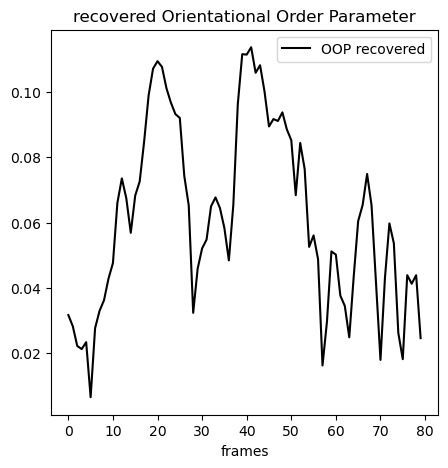

In [22]:
sg_tools.visualization.OOP()

The figure will be saved as ``recovered_OOP.png``.

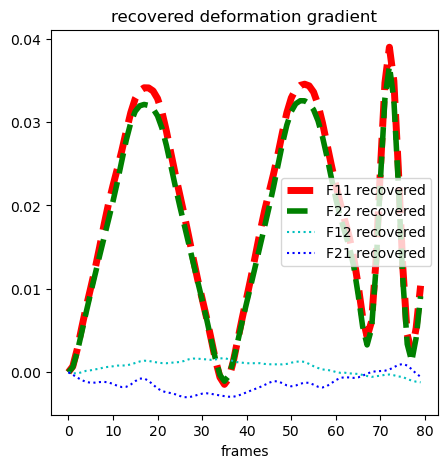

In [23]:
sg_tools.visualization.F()

The figure will be saved as ``recovered_F.png``.

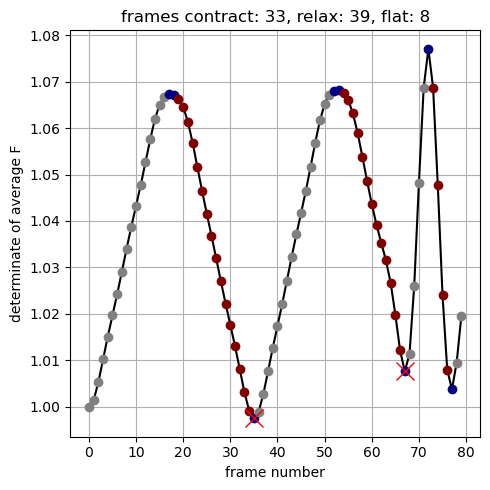

In [24]:
sg_tools.visualization.J()

The figure will be saved as ``recovered_J.png``.

In [25]:
sg_tools.visualization.F_eigenval_animation()

To visualize the GIF in jupyter notebook run the following:

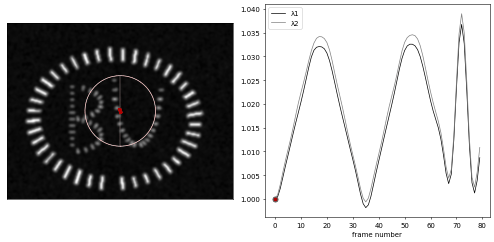

In [26]:
import imageio
from IPython.display import display, Image

def read_gif_frames(file_path):
    with imageio.get_reader(file_path, format='GIF') as reader:
        frames = [frame for frame in reader]
    return frames

def display_gif_frames(frames):
    gif_bytes = imageio.mimwrite(imageio.RETURN_BYTES, frames, format='GIF')
    display(Image(data=gif_bytes))

# Read the frames from the existing GIF file
gif_path = '../tutorial-results/F_anim.gif'
gif_frames = read_gif_frames(gif_path)

# Display the GIF using IPython.display
display_gif_frames(gif_frames)

The animation will be saved as ``F_anim.gif``.

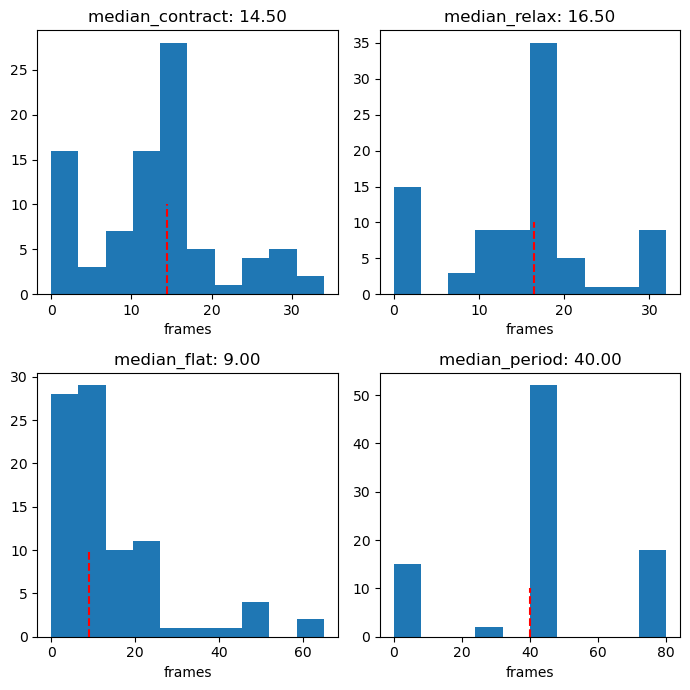

In [27]:
sg_tools.visualization.timeseries_params()

The figure will be saved as ``histogram_time_constants.png``.

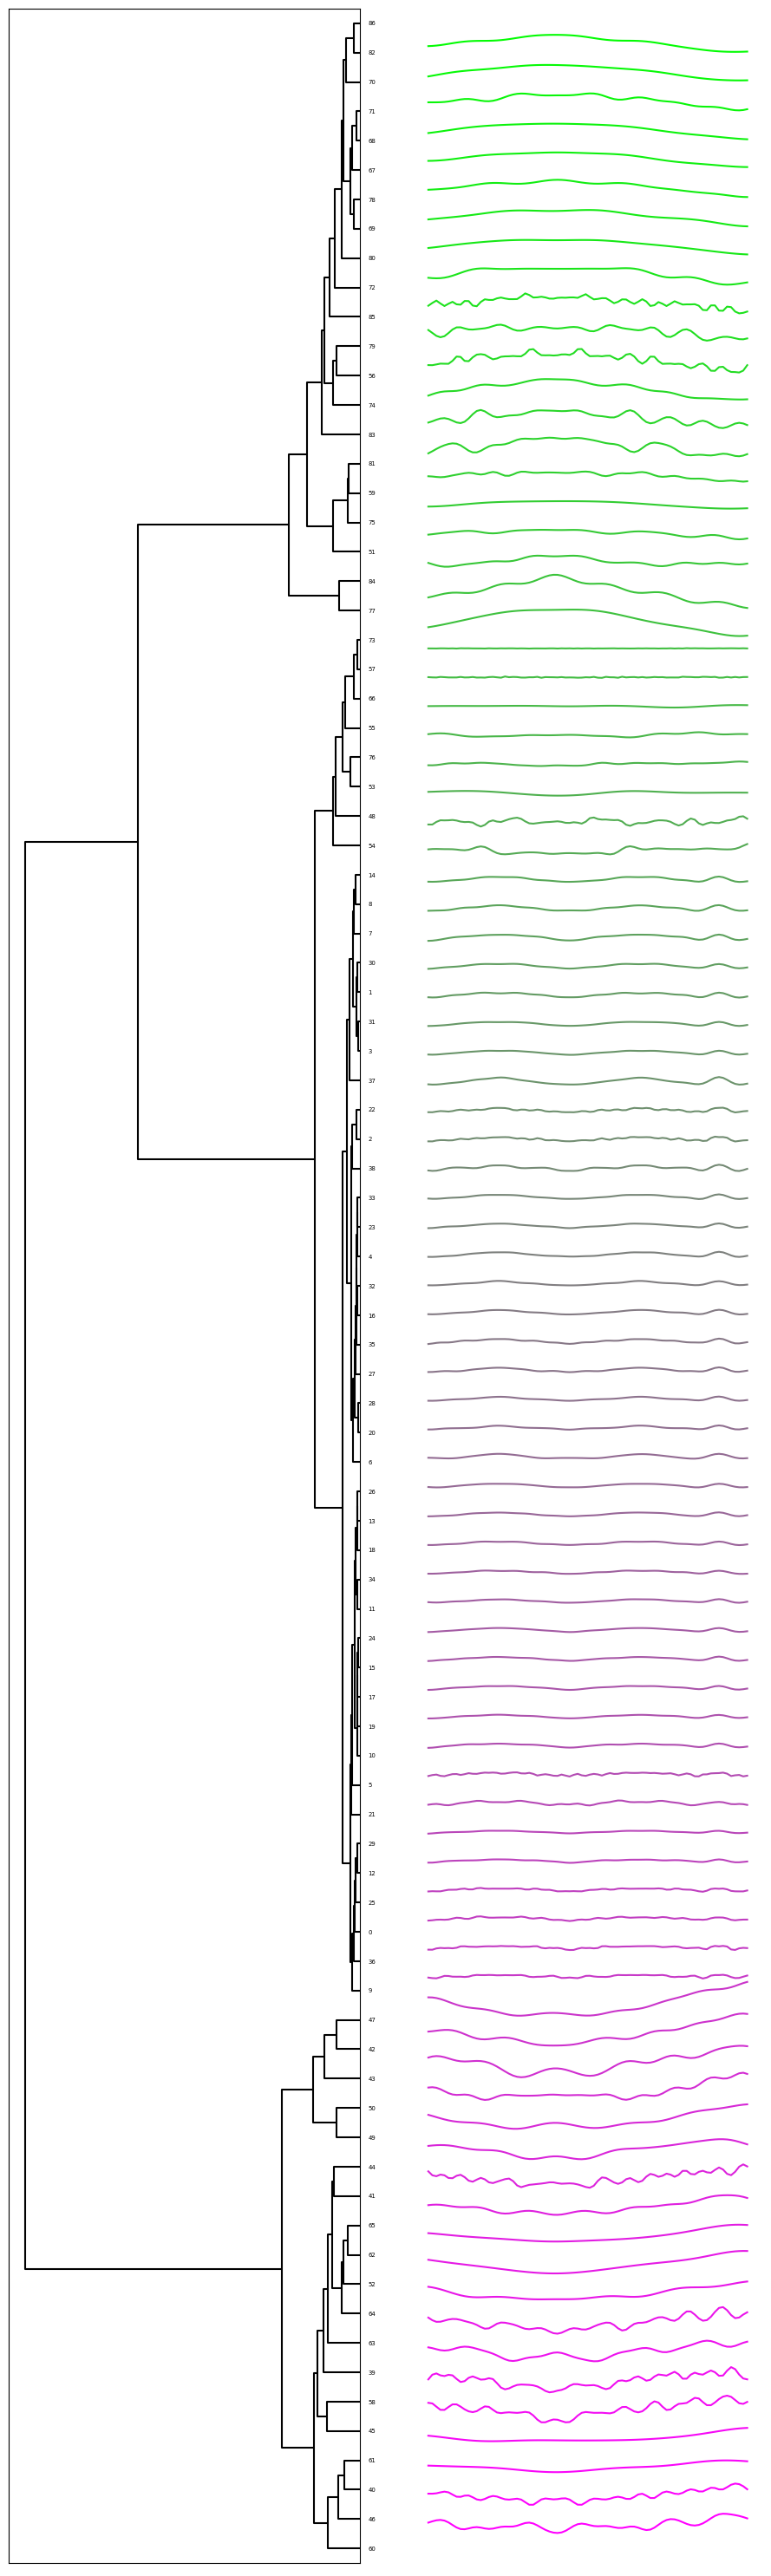

In [28]:
sg_tools.visualization.dendrogram(dist_func="euclidean")
# you can switch to dist_func="dtw"

The figure will be saved as ``dendrogram_euclidean.pdf``.

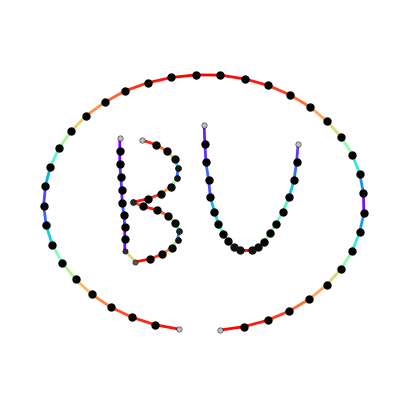

In [29]:
sg_tools.visualization.spatial_graph()

The figure will be saved as ``spatial-graph.png``.

**Note**

``tracked_vs_untracked()`` needs access to the original video/image file ``file_path``.

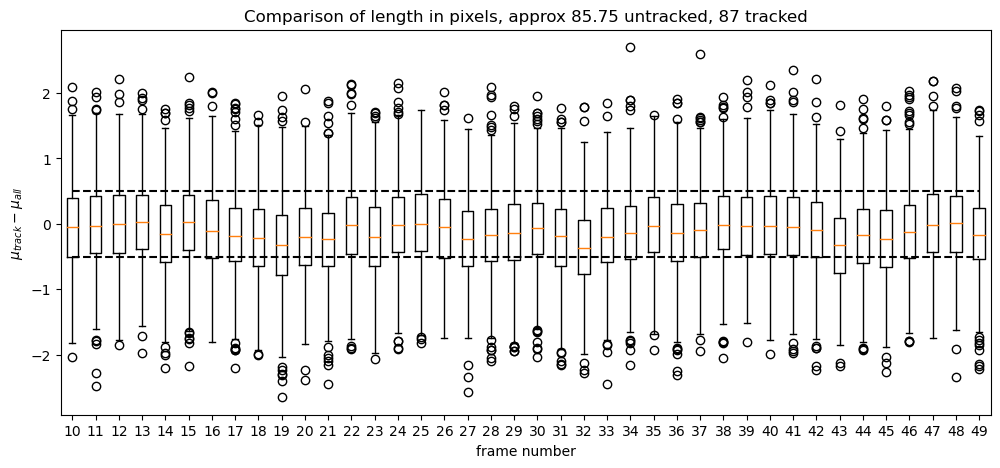

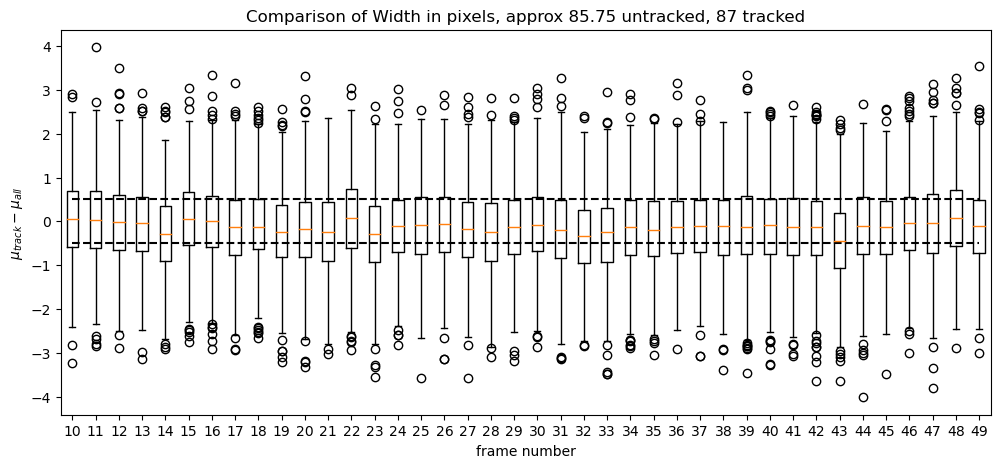

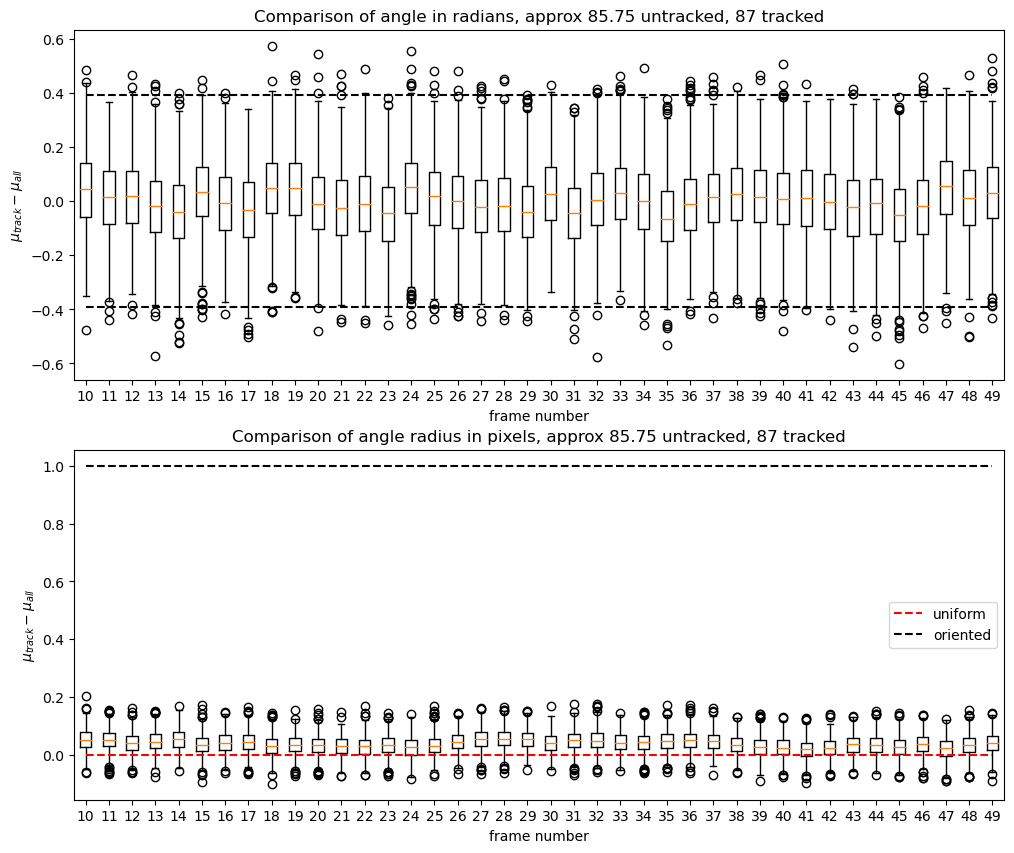

In [30]:
sg_tools.visualization.tracked_vs_untracked('../samples/sample_1.avi', start_frame=10, stop_frame=50)

The figures will be saved as ``length-comparison.png``, ``width-comparison.png``, and ``angle-comparison.png``.